In [54]:
# importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [55]:
df = pd.read_csv('total_houses.csv')
df.head()

,Price,Total_Area_m^2,Built_Area_m^2,Bedrooms,Bathrooms,Parking,Neighborhood
0,5650000.0,314.0,286.0,4.0,5.0,2.0,JURIQUILLA
1,1595000.0,69.0,0.0,3.0,1.0,1.0,CIUDAD DEL SOL
2,11190000.0,370.0,0.0,4.0,4.0,3.0,ALTOZANO
3,790000.0,195.0,150.0,3.0,3.0,2.0,LA JOYA
4,849000.0,400.0,400.0,5.0,4.0,4.0,JURIQUILLA


In [56]:
df = df[['Price','Total_Area_m^2']]
df.head()

,Price,Total_Area_m^2
0,5650000.0,314.0
1,1595000.0,69.0
2,11190000.0,370.0
3,790000.0,195.0
4,849000.0,400.0


# a) Pearson Correlation Coefficient


In [57]:
from scipy.stats import pearsonr

# Calculating the Pearson correlation coefficient for linear function
corr_coef ,_= pearsonr(df['Price'], df['Total_Area_m^2'])

# Printing values
print('---------------------------coefficient-------------------------------------')
print(f"Pearson coeficient between 'Price' and 'Total_Area_m^2' : {corr_coef:.3f}")

---------------------------coefficient-------------------------------------
Pearson coeficient between 'Price' and 'Total_Area_m^2' : 0.127


What is it?::

Pearson's correlation coefficient (r) is a statistical measure that quantifies the strength and direction of a linear relationship between two variables. The value ranges from -1 to 1.

r=1: Perfect positive linear correlation.

r=−1: Perfect negative linear correlation.

r=0: No linear correlation.

What happens if it fails?

A low value (close to 0) suggests a weak or non-existent linear relationship, indicating that a simple linear model may not be appropriate. However, it's crucial to remember that a low r value only means there's no linear relationship; there could still be a strong non-linear one (e.g., a parabolic curve).

# b) Scatter plot: Dependent variables VS Independent variables

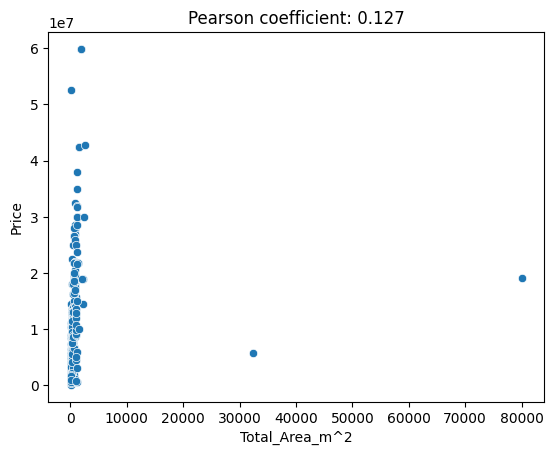

In [58]:
sns.scatterplot(x="Total_Area_m^2", y="Price", data=df)
plt.title(f'Pearson coefficient: {corr_coef:.3f}')
plt.show()

In [59]:
# Import the necessary library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Separate the data into features (X) and the target (y)
X = df[['Total_Area_m^2']]  # Nota: usamos doble corchete para obtener un DataFrame
y = df['Price']

# Split the data into 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the dataset sizes
print(f"Training set size: {X_train.shape[0]} datos")
print(f"Testing set size: {X_test.shape[0]} datos")

# Create an instance of the linear regression model
model = LinearRegression()

# Train the model with the training data
model.fit(X_train, y_train)

# Make predictions on the training set
y_pred_train = model.predict(X_train)

Training set size: 691 datos
Testing set size: 173 datos


# c) Residuals analysis

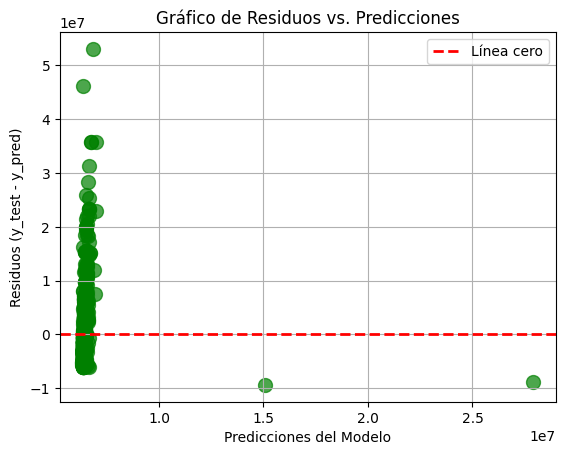

In [60]:
# 2. Calcular los residuos
residuos = y_train - y_pred_train

# Crear el gráfico de residuos vs. predicciones
#plt.figure(figsize=(15, 5))
plt.scatter(y_pred_train, residuos, alpha=0.7, s=100, color= 'green') # 'alpha' para mejor visualización si hay muchos puntos
plt.title('Gráfico de Residuos vs. Predicciones')
plt.xlabel('Predicciones del Modelo')
plt.ylabel('Residuos (y_test - y_pred)')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Línea cero')
plt.legend()
plt.grid(True)

**What is it?**

A residuals plot is a scatter plot of the residuals (the difference between the actual and predicted values) on the y-axis and the predicted values on the x-axis. It is a key post-modeling diagnostic tool. For a well-fitted linear model, the residuals should be randomly scattered around a horizontal line at zero, showing no discernible pattern.

**What happens if it fails?**

If the plot shows a clear pattern (e.g., a parabolic curve, a fan shape, or a funnel shape), it indicates a violation of the linearity assumption. A common failure is a "U" or inverted "U" shape, which suggests the model is underestimating and overestimating the dependent variable at different ranges. A fan shape (known as heteroscedasticity) indicates that the variance of the residuals is not constant, which also violates a key regression assumption.

**What can we do to fix it?**

If a pattern appears in the residuals plot, it's a strong sign that the model is mis-specified. You should:

Revisit the scatter plots of your variables to identify the non-linear relationship.

Transform the dependent or independent variables to linearize the relationship.

Add a polynomial term (e.g., x
2
 ) to your model to capture the curve.

# d) Ramsey's RESET Test

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_reset

# Dividir en train/test
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo con sklearn
#model_sklearn = LinearRegression().fit(X_train, y_train)

# Ajustar modelo equivalente con statsmodels en train
X_train_sm = sm.add_constant(X_train)
model_sm = sm.OLS(y_train, X_train_sm).fit()

# Prueba de Ramsey en TRAIN
reset_test = linear_reset(model_sm, power=2, use_f=True)
print(reset_test)

<F test: F=39.33507765430226, p=6.306978083049801e-10, df_denom=688, df_num=1>


What is it?

The Ramsey's RESET (Regression Equation Specification Error Test) is a formal statistical test that checks if a non-linear combination of the fitted values has any power to explain the response variable. It works by fitting a new model that includes powers of the fitted values from the original model. If these new terms are statistically significant, the original model is likely mis-specified.

What happens if it fails?

The test reports a p-value.

Low p-value (typically < 0.05): You reject the null hypothesis that the model is correctly specified. This is a red flag that your linear model is missing important non-linear terms.

High p-value (> 0.05): You fail to reject the null hypothesis. The test provides no evidence that the model is mis-specified.
El resultado te da un F-test con su p-value:

p-value > 0.05 → No se rechaza la hipótesis nula → el modelo lineal parece correcto.

p-value < 0.05 → Se rechaza → hay evidencia de no linealidad o mala especificación.

In [62]:
df.head()

,Price,Total_Area_m^2
0,5650000.0,314.0
1,1595000.0,69.0
2,11190000.0,370.0
3,790000.0,195.0
4,849000.0,400.0


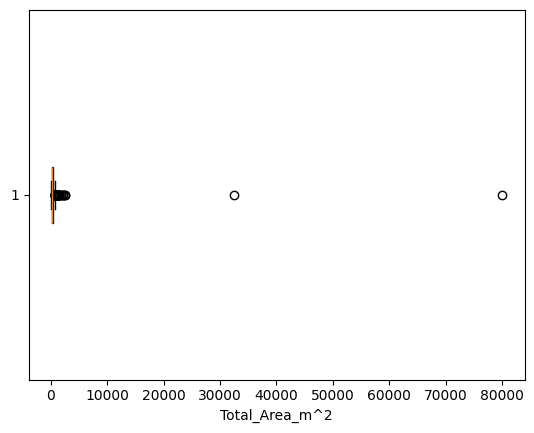

In [63]:
plt.boxplot(df['Total_Area_m^2'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.xlabel('Total_Area_m^2')
plt.show()

In [64]:

max_whisker = df['Total_Area_m^2'].quantile(0.75) + (1.5 * (df['Total_Area_m^2'].quantile(0.75) - df['Total_Area_m^2'].quantile(0.25)))
print(max_whisker)
df = df[df['Total_Area_m^2']<max_whisker]

698.125


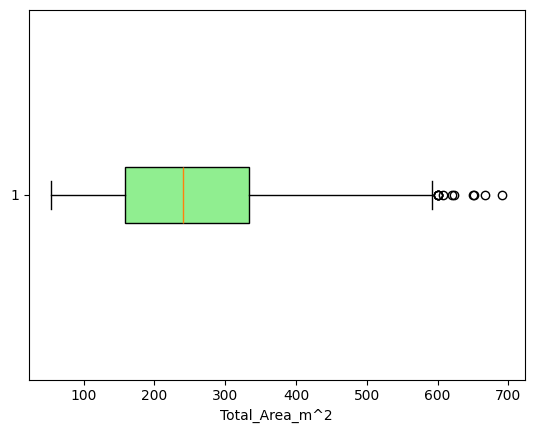

In [65]:
plt.boxplot(df['Total_Area_m^2'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.xlabel('Total_Area_m^2')
plt.show()

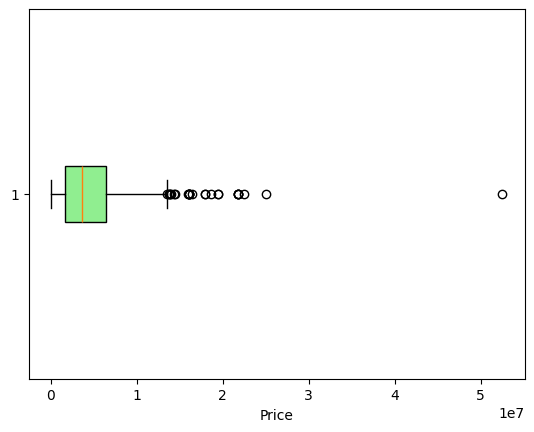

In [66]:
plt.boxplot(df['Price'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.xlabel('Price')
plt.show()

In [67]:
max_whisker = df['Price'].quantile(0.75) + (1.5 * (df['Price'].quantile(0.75) - df['Price'].quantile(0.25)))
print(max_whisker)
df = df[df['Price']<max_whisker]

13571750.0


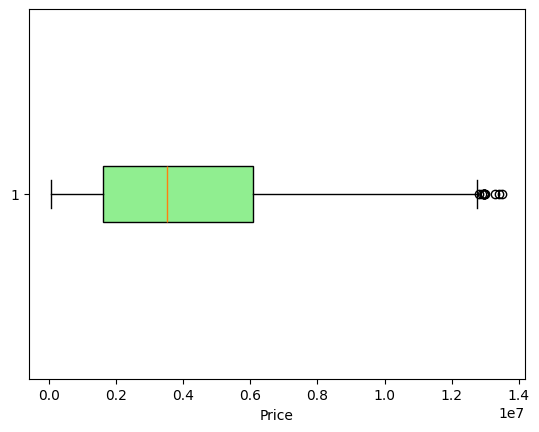

In [68]:
plt.boxplot(df['Price'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.xlabel('Price')
plt.show()

In [69]:
from scipy.stats import pearsonr

# Calculating the Pearson correlation coefficient for linear function
corr_coef ,_= pearsonr(df['Price'], df['Total_Area_m^2'])

# Printing values
print('---------------------------coefficient-------------------------------------')
print(f"Pearson coeficient between 'Price' and 'Total_Area_m^2' : {corr_coef:.3f}")

---------------------------coefficient-------------------------------------
Pearson coeficient between 'Price' and 'Total_Area_m^2' : 0.585


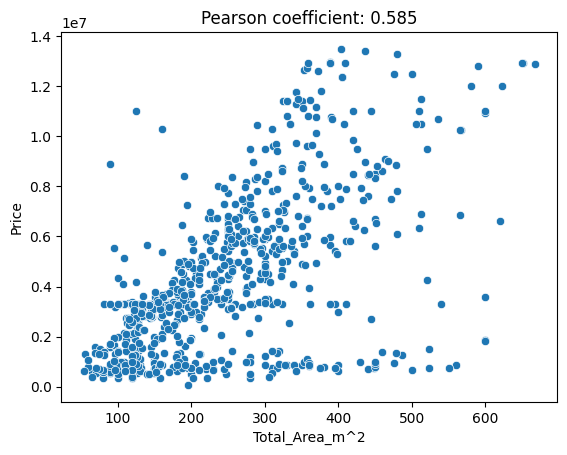

In [70]:
sns.scatterplot(x="Total_Area_m^2", y="Price", data=df)
plt.title(f'Pearson coefficient: {corr_coef:.3f}')
plt.show()

In [71]:
# Import the necessary library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Separate the data into features (X) and the target (y)
X = df[['Total_Area_m^2']]  # Nota: usamos doble corchete para obtener un DataFrame
y = df['Price']

# Split the data into 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the dataset sizes
print(f"Training set size: {X_train.shape[0]} datos")
print(f"Testing set size: {X_test.shape[0]} datos")

# Create an instance of the linear regression model
model = LinearRegression()

# Train the model with the training data
model.fit(X_train, y_train)

# Make predictions on the training set
y_pred_train = model.predict(X_train)

Training set size: 596 datos
Testing set size: 150 datos


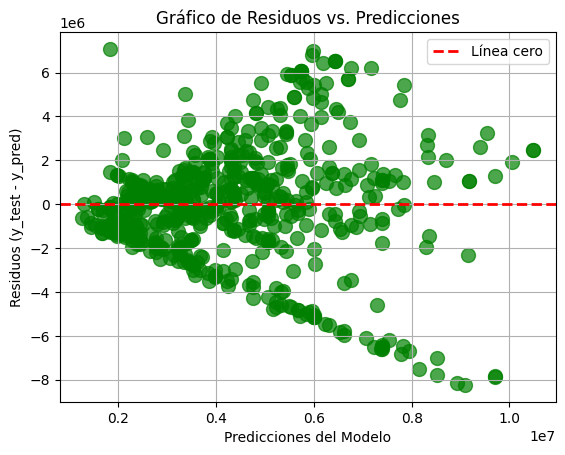

In [72]:
# 2. Calcular los residuos
residuos = y_train - y_pred_train

# Crear el gráfico de residuos vs. predicciones
#plt.figure(figsize=(15, 5))
plt.scatter(y_pred_train, residuos, alpha=0.7, s=100, color= 'green') # 'alpha' para mejor visualización si hay muchos puntos
plt.title('Gráfico de Residuos vs. Predicciones')
plt.xlabel('Predicciones del Modelo')
plt.ylabel('Residuos (y_test - y_pred)')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Línea cero')
plt.legend()
plt.grid(True)

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_reset

# Dividir en train/test
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo con sklearn
#model_sklearn = LinearRegression().fit(X_train, y_train)

# Ajustar modelo equivalente con statsmodels en train
X_train_sm = sm.add_constant(X_train)
model_sm = sm.OLS(y_train, X_train_sm).fit()

# Prueba de Ramsey en TRAIN
reset_test = linear_reset(model_sm, power=2, use_f=True)
print(reset_test)

<F test: F=15.436778069827284, p=9.535795725067829e-05, df_denom=593, df_num=1>


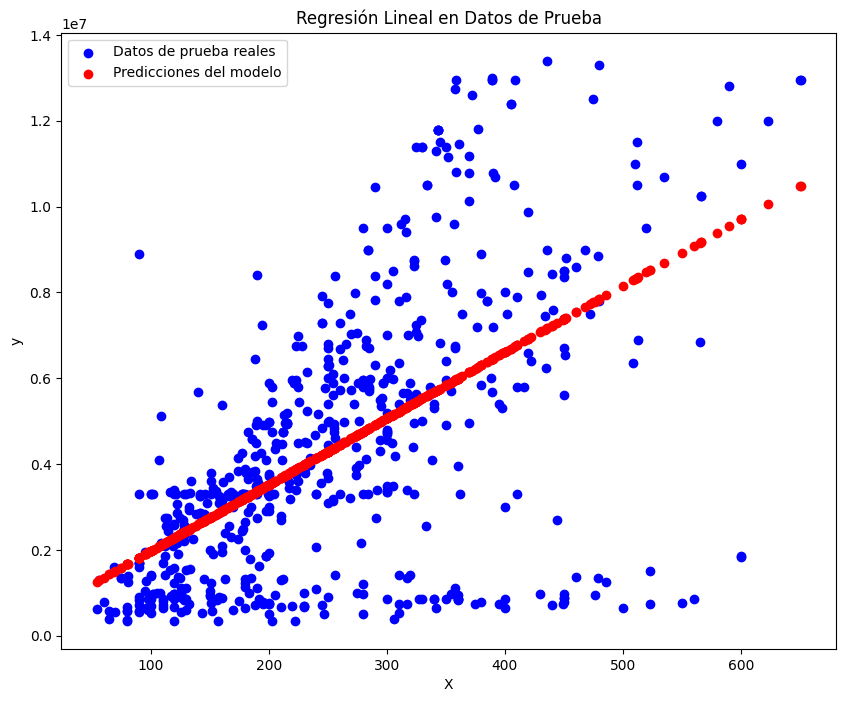

In [74]:
plt.figure(figsize=(10, 8))
plt.scatter(X_train, y_train, color='blue', label='Datos de prueba reales')
plt.scatter(X_train, y_pred_train, color='red', label='Predicciones del modelo')
#plt.plot(X_test, y_pred, color='red', linewidth=1, label='Predicciones del modelo')
plt.title('Regresión Lineal en Datos de Prueba')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [75]:

df[df['Price']<1800000]


,Price,Total_Area_m^2
1,1595000.0,69.0
3,790000.0,195.0
4,849000.0,400.0
5,849000.0,330.0
6,749000.0,310.0
...,...,...
817,1219702.0,120.0
818,1300000.0,75.0
819,1759602.0,150.0
820,1702000.0,90.0


In [76]:
df = df[df['Price']>1800000]
df.shape

(550, 2)

In [77]:
# Calculating the Pearson correlation coefficient for linear function
corr_coef ,_= pearsonr(df['Price'], df['Total_Area_m^2'])

# Printing values
print('---------------------------coefficient-------------------------------------')
print(f"Pearson coeficient between 'Price' and 'Total_Area_m^2' : {corr_coef:.3f}")

---------------------------coefficient-------------------------------------
Pearson coeficient between 'Price' and 'Total_Area_m^2' : 0.672


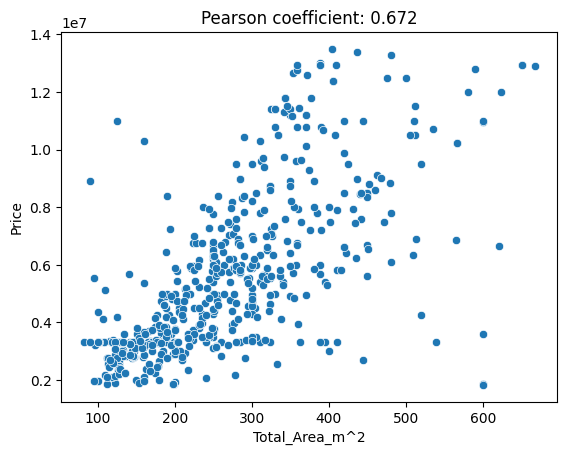

In [78]:
sns.scatterplot(x="Total_Area_m^2", y="Price", data=df)
plt.title(f'Pearson coefficient: {corr_coef:.3f}')
plt.show()

In [79]:
# Import the necessary library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Separate the data into features (X) and the target (y)
X = df[['Total_Area_m^2']]  # Nota: usamos doble corchete para obtener un DataFrame
y = df['Price']

# Split the data into 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the dataset sizes
print(f"Training set size: {X_train.shape[0]} datos")
print(f"Testing set size: {X_test.shape[0]} datos")

# Create an instance of the linear regression model
model = LinearRegression()

# Train the model with the training data
model.fit(X_train, y_train)

# Make predictions on the training set
y_pred_train = model.predict(X_train)

Training set size: 440 datos
Testing set size: 110 datos


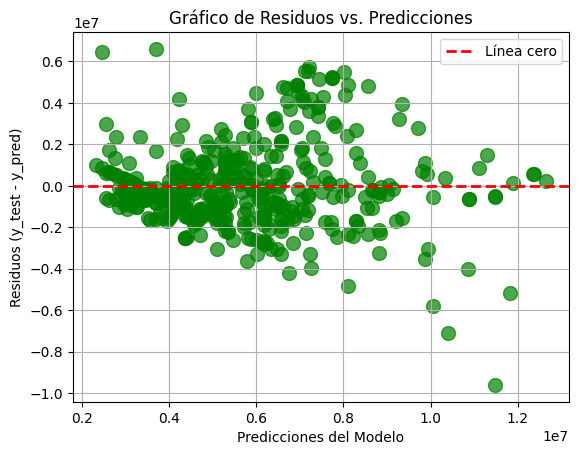

In [80]:
# 2. Calcular los residuos
residuos = y_train - y_pred_train

# Crear el gráfico de residuos vs. predicciones
#plt.figure(figsize=(15, 5))
plt.scatter(y_pred_train, residuos, alpha=0.7, s=100, color= 'green') # 'alpha' para mejor visualización si hay muchos puntos
plt.title('Gráfico de Residuos vs. Predicciones')
plt.xlabel('Predicciones del Modelo')
plt.ylabel('Residuos (y_test - y_pred)')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Línea cero')
plt.legend()
plt.grid(True)

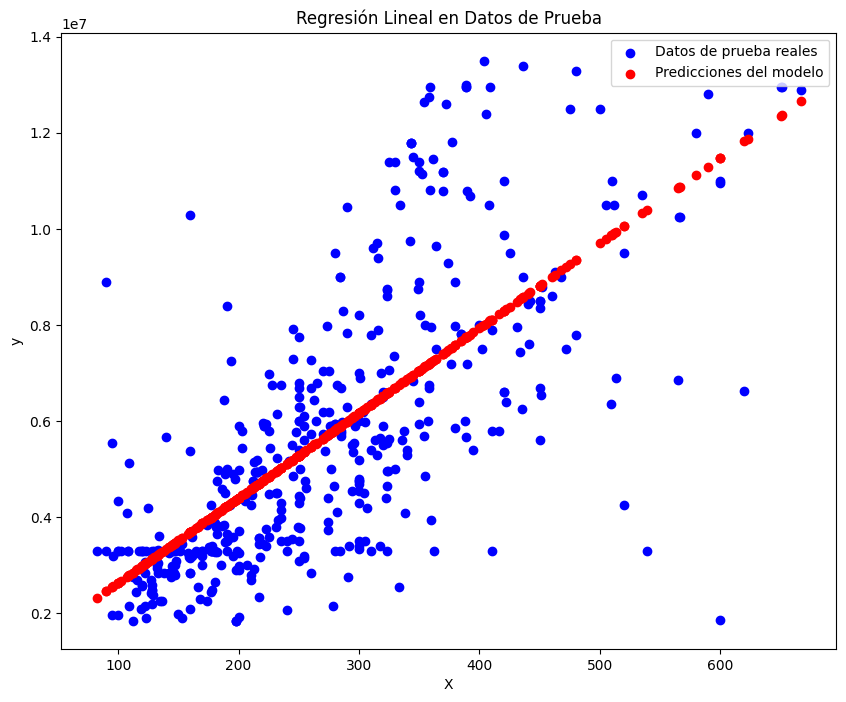

In [81]:
plt.figure(figsize=(10, 8))
plt.scatter(X_train, y_train, color='blue', label='Datos de prueba reales')
plt.scatter(X_train, y_pred_train, color='red', label='Predicciones del modelo')
#plt.plot(X_test, y_pred, color='red', linewidth=1, label='Predicciones del modelo')
plt.title('Regresión Lineal en Datos de Prueba')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

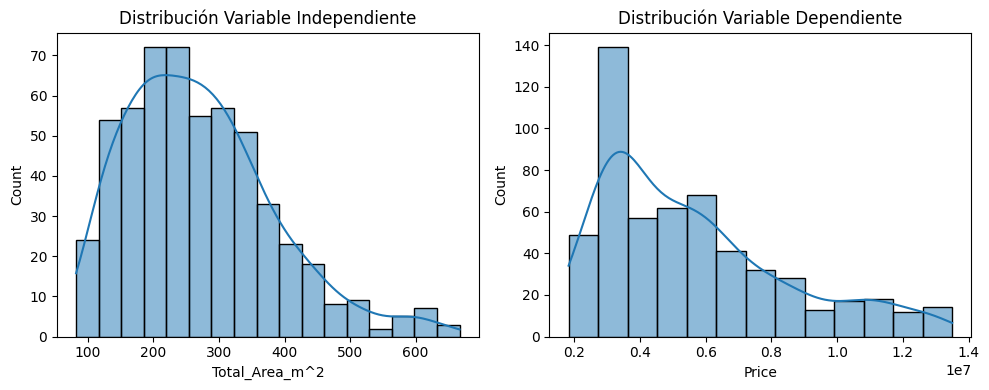

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt


# Supongamos que tus datos están en un DataFrame 'data'
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.histplot(df['Total_Area_m^2'], kde=True)
plt.title('Distribución Variable Independiente')

plt.subplot(1, 2, 2)
sns.histplot(df['Price'], kde=True)
plt.title('Distribución Variable Dependiente')
plt.tight_layout()
plt.show()

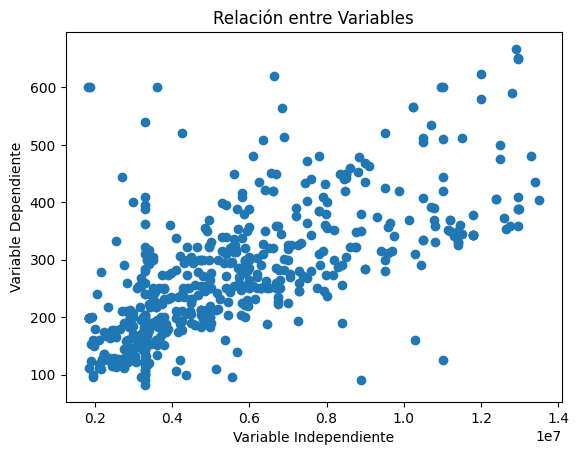

In [83]:
plt.scatter(df['Price'], df['Total_Area_m^2'])
plt.xlabel('Variable Independiente')
plt.ylabel('Variable Dependiente')
plt.title('Relación entre Variables')
plt.show()

Correlación original: 0.672
Correlación tras log-transformación: 0.688


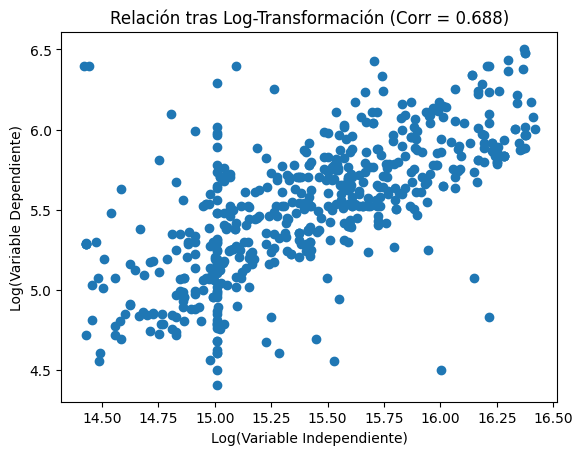

In [84]:
# Aplicar transformación logarítmica
df['log_independiente'] = np.log(df['Price'])
df['log_dependiente'] = np.log(df['Total_Area_m^2'])

# Calcular correlación después de la transformación
corr_before, _ = pearsonr(df['Price'], df['Total_Area_m^2'])
corr_after, _ = pearsonr(df['log_independiente'], df['log_dependiente'])
print(f"Correlación original: {corr_before:.3f}")
print(f"Correlación tras log-transformación: {corr_after:.3f}")

# Graficar la nueva relación
plt.scatter(df['log_independiente'], df['log_dependiente'])
plt.xlabel('Log(Variable Independiente)')
plt.ylabel('Log(Variable Dependiente)')
plt.title(f'Relación tras Log-Transformación (Corr = {corr_after:.3f})')
plt.show()

R² Ridge: 0.452
Coeficiente Ridge: [2.68390511e-05]
R² Lasso: 0.452
Coeficiente Lasso: [2.68390509e-05]
R² Regresión Lineal: 0.452
Coeficiente Regresión Lineal: [2.68390511e-05]


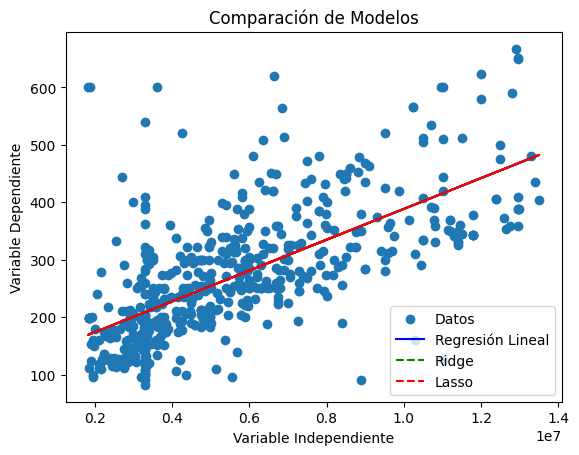

In [85]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import r2_score
import numpy as np

# Preparar datos
X = df[['Price']].values
y = df['Total_Area_m^2'].values

# Modelo Ridge
ridge = Ridge(alpha=1.0)  # alpha controla la fuerza de la regularización
ridge.fit(X, y)
y_pred_ridge = ridge.predict(X)
r2_ridge = r2_score(y, y_pred_ridge)
print(f"R² Ridge: {r2_ridge:.3f}")
print(f"Coeficiente Ridge: {ridge.coef_}")

# Modelo Lasso
lasso = Lasso(alpha=1.0)
lasso.fit(X, y)
y_pred_lasso = lasso.predict(X)
r2_lasso = r2_score(y, y_pred_lasso)
print(f"R² Lasso: {r2_lasso:.3f}")
print(f"Coeficiente Lasso: {lasso.coef_}")

# Comparar con regresión lineal estándar
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X, y)
y_pred_lr = lr.predict(X)
r2_lr = r2_score(y, y_pred_lr)
print(f"R² Regresión Lineal: {r2_lr:.3f}")
print(f"Coeficiente Regresión Lineal: {lr.coef_}")

# Graficar resultados
import matplotlib.pyplot as plt
plt.scatter(X, y, label='Datos')
plt.plot(X, y_pred_lr, color='blue', label='Regresión Lineal')
plt.plot(X, y_pred_ridge, color='green', linestyle='--', label='Ridge')
plt.plot(X, y_pred_lasso, color='red', linestyle='--', label='Lasso')
plt.xlabel('Variable Independiente')
plt.ylabel('Variable Dependiente')
plt.title('Comparación de Modelos')
plt.legend()
plt.show()